## Needed imports

In [93]:
import pygad
import numpy
import time
import math


## Setup initial values

In [94]:
S = [
    [1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,1,0,0,0,1,0,0,1],
    [1,1,1,0,0,0,1,0,1,1,0,1],
    [1,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,1,0,1,1,0,0,1,1,0,1],
    [1,0,0,1,1,0,0,0,1,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,1,1],
    [1,0,1,0,0,1,1,0,1,0,0,1],
    [1,0,1,1,1,0,0,0,1,1,0,1],
    [1,0,1,0,1,1,0,1,0,1,0,1],
    [1,0,1,0,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1]
]

# [2. 2. 1. 2. 2. 3. 2. 2. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1.
#  0. 1. 0. 3. 1. 2.]

gene_space = [0, 1, 2, 3]

## Define fitness function

In [95]:
#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    fitness = 0
    squares_visited = set()
    starting_position = (1, 1)
    ending_position = (10, 10)
    current_position = starting_position
    squares_visited.add(current_position)
    moves = {0: (0, -1), 1: (1, 0), 2: (0, 1), 3: (-1, 0)}
    # dol, prawo, lewo, gora
    for gene in solution:
        previous_position = current_position
        current_position = (current_position[0] + moves[gene][0], current_position[1] + moves[gene][1])
        (current_position_y, current_position_x) = current_position
        if any([
            current_position_x < 0,
            current_position_x >= len(S[0]),
            current_position_y < 0,
            current_position_y >= len(S)
        ]):
            return 0

        if S[current_position_y][current_position_x] == 1:
            fitness -= 10
            current_position = previous_position
        else:
            if current_position == ending_position:
                fitness += 150
                break
            if current_position in squares_visited:
                fitness -= 5
            else:
                fitness += 2
        squares_visited.add(current_position)
    return fitness

## Define all values required in pygad.GA function

In [96]:
fitness_function = fitness_func
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 300
num_genes = 30
#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 50
num_generations = 200
keep_parents = 10
#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"
#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"
#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 10

## Run the genetic algorithm AI training

In [97]:
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
start = time.time()
print("hello")

ga_instance.run()
print(ga_instance.generations_completed)

hello
200


# Final results

3.9138312339782715
[2. 2. 1. 2. 2. 3. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 3. 2. 0.
 0. 0. 2. 3. 3. 3.]
188


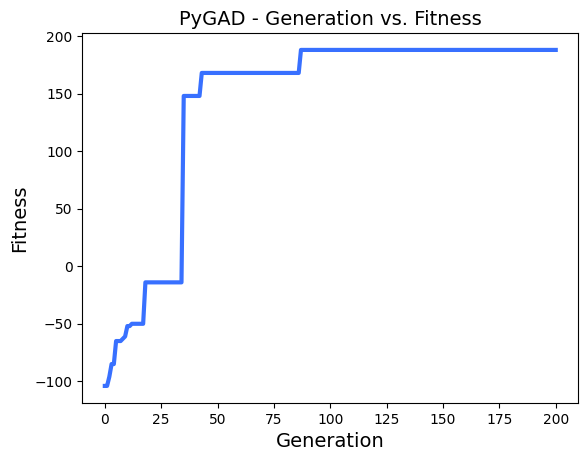

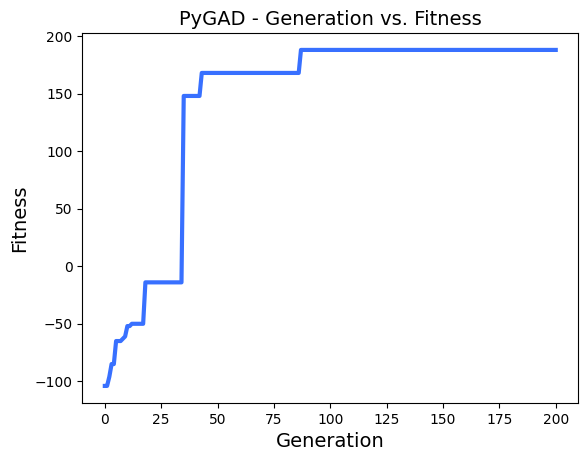

In [98]:
end = time.time()
print(end - start)

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# THESE LINES BELOW BUG THE CODE
# prediction = numpy.sum(S*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()